# TestCase3 - Convergence FEM / PINNs+Corr

In [1]:
# sélection du cas test
testcase = 3
size_param = "big"
largenet = False
param_num = 1
degree = 1
high_degree = 10

In [2]:
assert testcase == 3
assert size_param in ["small","medium","big","new"]

**Idée :** On se place ici dans le TestCase3.

On cherche à vérifier les convergences obtenues pour

- FEM standard
- le PINNs + Correction par addition

On choisira d'effectuer ces convergences en P1,P2 et P3

## Imports + Load

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import os
import dolfin as df
import seaborn as sns
import dataframe_image as dfi

# from modfenics.fenics_expressions.fenics_expressions_2D import UexExpr
from scimba.equations.domain import SpaceTensor
from scimba.equations import domain

from testcases.utils import create_tree
from testcases.geometry.geometry_2D import Square
from modfenics.fenics_expressions.fenics_expressions import FExpr,AnisotropyExpr
from modfenics.utils import get_param,compute_slope
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all,plot_Corr_vs_FEM

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


Using device: cuda
cuda devices:        1
cuda current device: 0
cuda device name:    NVIDIA RTX 2000 Ada Generation Laptop GPU


In [5]:
if size_param != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
from modfenics.solver_fem.EllipticDirSquareFEMSolver import EllipticDirSquareFEMSolver

    
problem = TestCase3(version=size_param)

dim_params = problem.nb_parameters
result_dir = "../../../results/fenics/test_2D/testcase"+str(testcase)+"/"+size_param
if size_param == "medium" and largenet:
    result_dir += "_largenet"
result_dir += "/cvg/"
create_tree(result_dir)

torch loaded; device is cuda


init
init
>> load network /home/flecourtier/Bureau/Article1/code/networks/test_2D/test_fe3.pth
network loaded


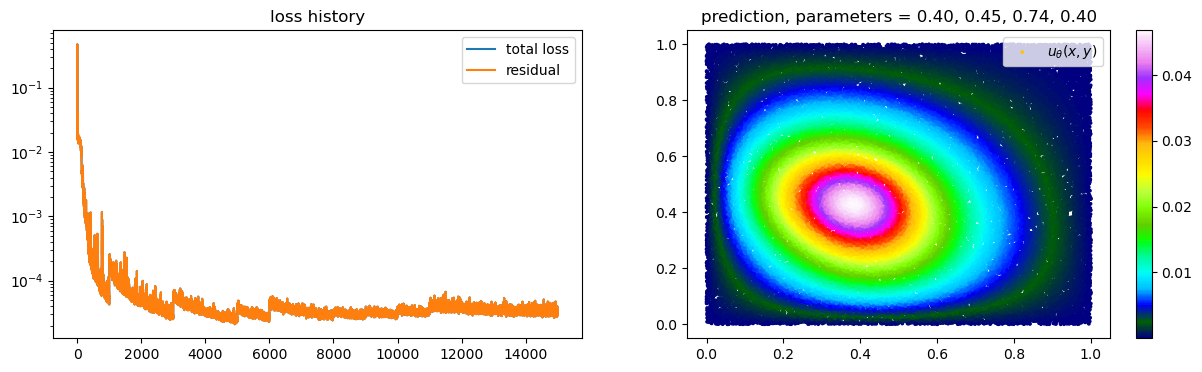

In [6]:
if size_param != "new":
    pde = Poisson_2D(size_param)
    trainer,u_theta = Run_laplacian2D(pde,size_param,largenet)
else:
    pde = Poisson_2D()
    trainer,u_theta = Run_laplacian2D(pde)

## Convergence FEM

In [9]:
# degree = 2
# df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree1.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree2.csv
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Read csv file ../../../results/fenics/test_2D/testcase3/big/cvg/FEM_case3_vbig_param1_degree3.csv


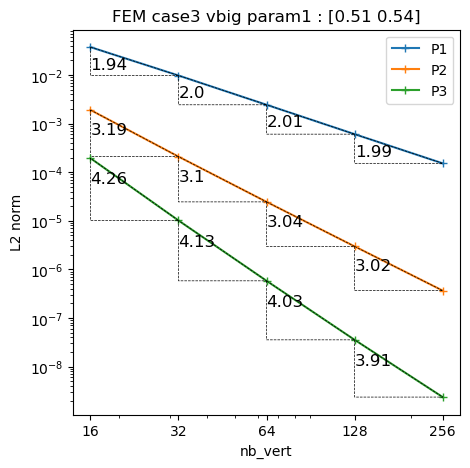

In [11]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

## Convergence PINNs+Corr

In [ ]:
# degree = 2
# df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

In [16]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

parameter_domain :  [[0.4, 0.6], [0.4, 0.6], [0.1, 0.8], [0.01, 1.0]]
parameter_domain :  [[0.4, 0.6], [0.4, 0.6], [0.1, 0.8], [0.01, 1.0]]
../../../results/fenics/test_2D/testcase3/big/cvg/u_ref/u_ref_1.npy
## Run error estimation with Corr (add) for degree=1
[array([0.51, 0.54, 0.52, 0.55])]
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
V_ref created with  1000  vertices and degree  3
Load reference solution
Mesh created with  16  vertices : h = 0.09428090415820647


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


<Figure size 500x500 with 0 Axes>

## Plots

degree=1
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/FEM_case3_param1_degree1.csv
degree=2
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/FEM_case3_param1_degree2.csv
degree=3
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/FEM_case3_param1_degree3.csv
degree=1
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/Corr_case3_param1_degree1.csv
degree=2
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/Corr_case3_param1_degree2.csv
degree=3
Read csv file ../../../results/fenics/test_2D/testcase3/new/cvg/Corr_case3_param1_degree3.csv


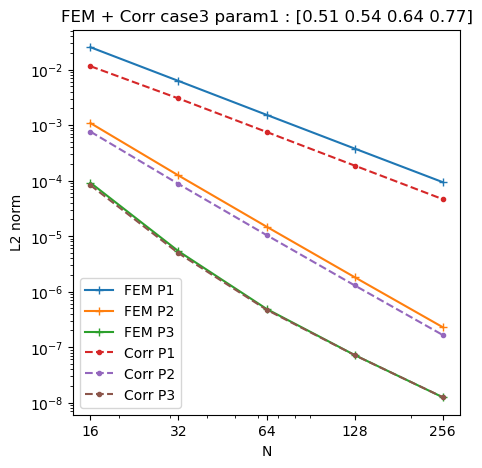

In [19]:
plt.figure(figsize=(5, 5))

# plot FEM error (L2 norm) as a function of h
for d in [1, 2, 3]:
    print(f"degree={d}")
    df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = run_FEM(d)
    plt.loglog(df_FEM['nb_vert'], df_FEM['err'], "+-", label='FEM P'+str(d))

# plot Corr error (L2 norm) as a function of h
for d in [1, 2, 3]:
    print(f"degree={d}")
    df_Corr,tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = run_Corr(d)
    plt.loglog(df_Corr['nb_vert'], df_Corr['err'], ".--", label='Corr P'+str(d))

plt.xticks(df_Corr['nb_vert'], df_Corr['nb_vert'].round(3).astype(str), minor=False)
plt.xlabel("N")
plt.ylabel('L2 norm')
plt.legend()
plt.title(f'FEM + Corr case{testcase} param{param_num} : {param}')
plt.savefig(result_dir+f'FEM-Corr_case{testcase}_param{param_num}.png')